# Music ontologies survey

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from textwrap import wrap
from collections import Counter, OrderedDict

In [26]:
sns.set_theme(style="darkgrid")

In [27]:
survey_df = pd.read_csv("./survey_responses_40.csv")

questions = list(survey_df.columns)

In [28]:
def to_other(record, mappings:dict):
    for replace_str, with_str in mappings.items():
        record = record.replace(replace_str, with_str)
    return record

def otherise_answers(col_idx, mappings):
    if isinstance(mappings, list):
        mappings = {s: "Other" for s in mappings}
    return survey_df.iloc[:, col_idx].apply(
        to_other, mappings=mappings)

def split_answers(series):
    return series.str.get_dummies(sep=';')


In [29]:
def plot_cbar(question_df, col_index, figsize=(8,4),
              title_wrap=80, title_fs=16, ax=None, lab_wrap=25, tick_fs=16):

    if ax is None:
            _, ax = plt.subplots(figsize=figsize)

    cnt_df = pd.DataFrame(question_df.sum(), columns=["count"])
    cnt_df.index.name = "answer"  # from index to answer
    cnt_df = cnt_df.reset_index()  # just needed for plotting
    ax = sns.barplot(y="answer", x="count", data=cnt_df, ax=ax, orient="h")
    ax.set_title("\n".join(wrap(questions[col_index], title_wrap)), size=title_fs)
    ax.set_xticks(range(0, question_df.sum().max()+2))
    ax.set_ylabel("")  # remove 'answer' label for convenience

    new_xtick_labels = []
    for answer in ax.get_yticklabels():
        unwrapped_txt = answer.get_text()
        wrapped_txt = "\n".join(wrap(unwrapped_txt, lab_wrap))
        new_xtick_labels.append(wrapped_txt)
    assert(len(new_xtick_labels)==len(ax.get_yticklabels()))
    ax.set_yticklabels(new_xtick_labels, fontsize=tick_fs)

    return ax


def question_countplot(col_index:int, col="darkcyan", title_wrap=80):

    ax = sns.countplot(survey_df.iloc[:, col_index], color=col)
    pcts = Counter(survey_df.iloc[:, col_index])
    pcts = OrderedDict(sorted(pcts.items()))
    n = sum(pcts.values())
    pcts = [cnt/n*100 for cnt in list(pcts.values())]

    ax.set_title("\n".join(wrap(questions[col_index], title_wrap)))
    ax.set_xlabel("")  # remove question from the x-axis
    # ax.set_yticks(list(ax.get_yticks())+[ax.get_yticks()[-1]+1])

    patches = ax.patches
    for i in range(len(patches)):  # append percentages
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+.05
        ax.annotate('{:.1f}%'.format(pcts[i]), (x, y), ha='center')

    return ax


def question_barplot(col_index:int, col="darkcyan", title_wrap=80,
                     verbose=False, title_fs=16, ax=None):

        if ax is None:
            _, ax = plt.subplots()
        # Count the number of occurrences and fill missing items
        counts = Counter(survey_df.iloc[:, col_index])
        counts = {v: counts.get(v, 0) for v in range(1,6)}
        votes = sum(counts.values())  # sure these are exclusive
        pcts = [cnt/votes*100 for cnt in list(counts.values())]

        ax = sns.barplot(
            x=list(counts.keys()),
            y=list(counts.values()),
            color=col, ax=ax)

        ax.set_title("\n".join(wrap(questions[col_index], title_wrap)),
                     size=title_fs)
        ax.set_ylabel("count")
        if verbose:  # explain Likert scale if verbose
            ax.set_xticklabels([
                "1\n(strongly disagree)",
                "", "3\(nneutral)", "",
                "5\n(strongly agree)"])

        patches = ax.patches
        for i in range(len(patches)):  # append percentages
            x = patches[i].get_x() + patches[i].get_width()/2
            y = patches[i].get_height()+.05
            ax.annotate('{:.1f}%'.format(pcts[i]), (x, y), ha='center')

        return ax

# Questions 1-2

<AxesSubplot:xlabel='count'>

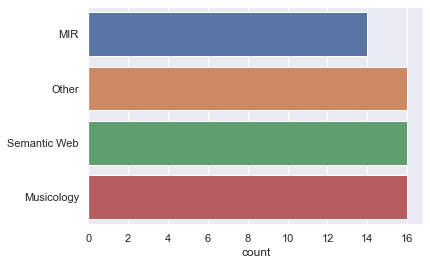

In [30]:
import itertools

# to_other = ["AI", "music theory", "Other", "Music interaction",
#             "Music economics and music sociology"]
to_mir  = ["Music Information Retrieval",
           "Generative Music", "Music technology"]
to_sweb = ["Digital library", "Semantic Web"]
to_musi = ["Musicology", "Computational Musicology",
           "Perceived rhyrthmic relationships in  improvisational polytemporal settings"]

raw_replies = [r.split(";") for r in survey_df.iloc[:,1]]
raw_replies = list(itertools.chain.from_iterable(raw_replies))

new_replies = []
for old_reply in raw_replies:
    if old_reply in to_mir:
        new_replies.append("MIR")
    elif old_reply in to_sweb:
        new_replies.append("Semantic Web")
    elif old_reply in to_musi:
        new_replies.append("Musicology")
    else:  # renaming everything else to other
        new_replies.append("Other")

# raw_replies

sns.countplot(y=new_replies)

<AxesSubplot:xlabel='count'>

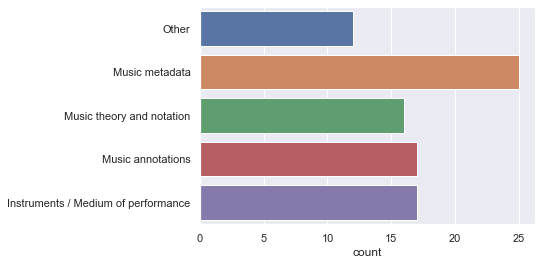

In [31]:
static = ["Music metadata", "Music theory and notation",
          "Instruments / Medium of performance", "Music annotations"]

raw_replies = [r.split(";") for r in survey_df.iloc[:,2]]
raw_replies = list(itertools.chain.from_iterable(raw_replies))

new_replies = []
for old_reply in raw_replies:
    if old_reply in static:
        new_replies.append(old_reply)
    else:  # this is the case to replace
        new_replies.append("Other")

sns.countplot(y=new_replies)

In [32]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,5))
# ax = plot_cbar(q2, col_index=1, ax=axes[0], tick_fs=16, title_fs=18)
# plot_cbar(q3, col_index=2, ax=axes[1], title_fs=18)


# plt.tight_layout()
# plt.savefig("survey_background_dtype.pdf")

# Questions 3-10

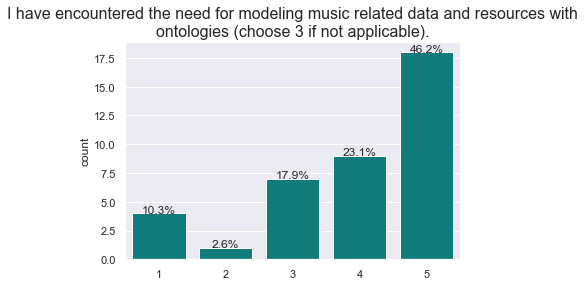

In [33]:
ax = question_barplot(3)

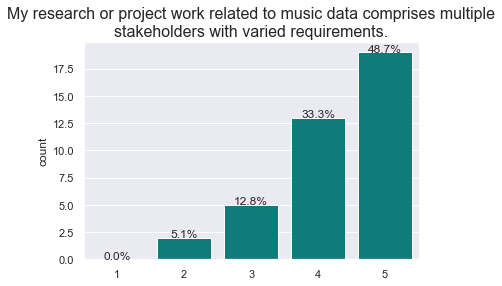

In [34]:
ax = question_barplot(4)

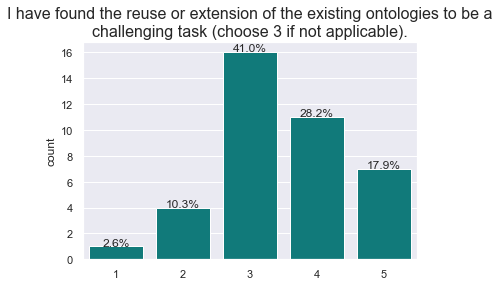

In [35]:
ax = question_barplot(6)


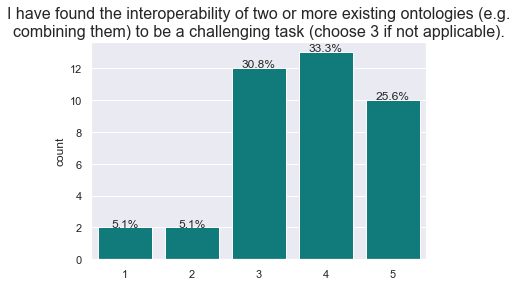

In [36]:
ax = question_barplot(7)

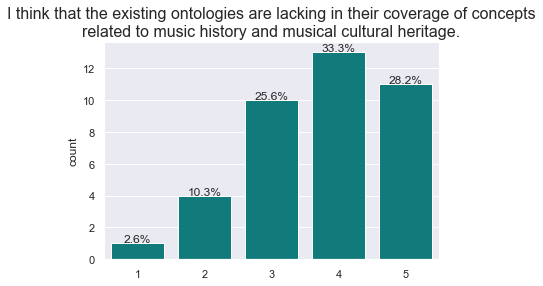

In [37]:
ax = question_barplot(8)


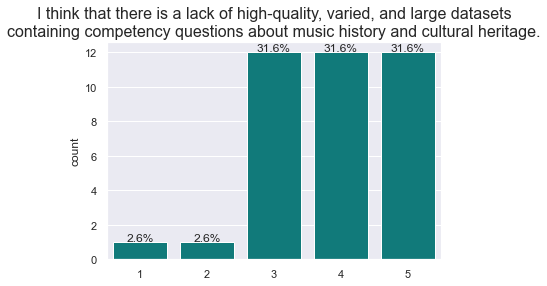

In [38]:
ax = question_barplot(9)

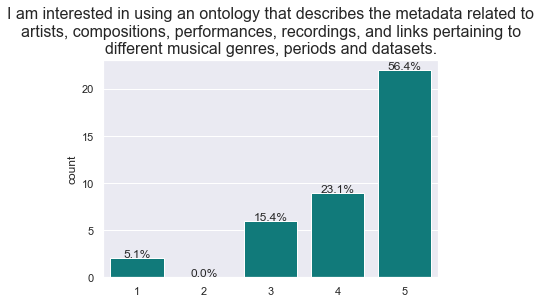

In [39]:
ax = question_barplot(10)

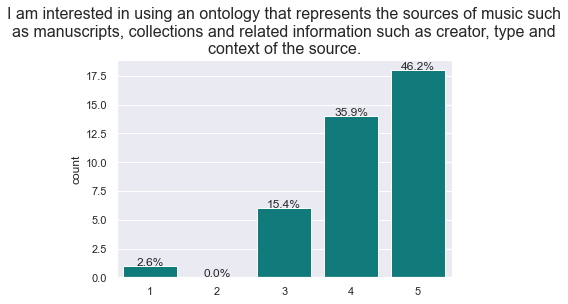

In [40]:
ax = question_barplot(11)

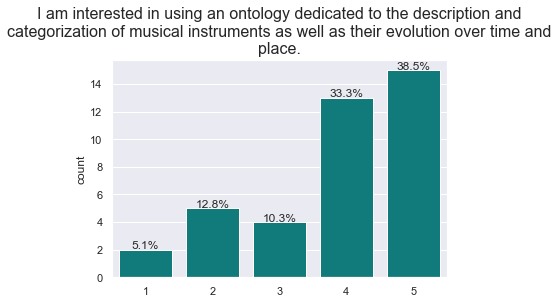

In [41]:
ax = question_barplot(12)

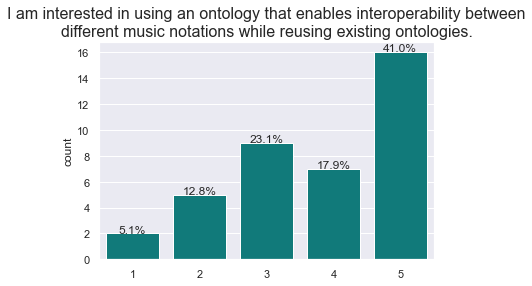

In [42]:
ax = question_barplot(13)

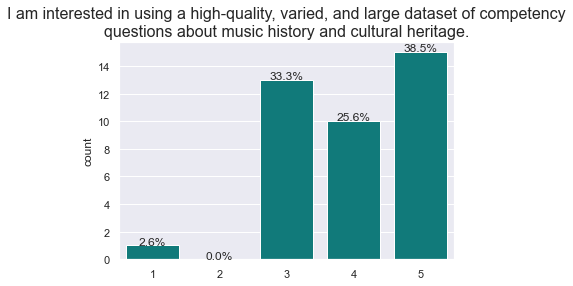

In [43]:
ax = question_barplot(14)

## All evidence plots together

In [47]:
list(range(7, 7+8))

[7, 8, 9, 10, 11, 12, 13, 14]

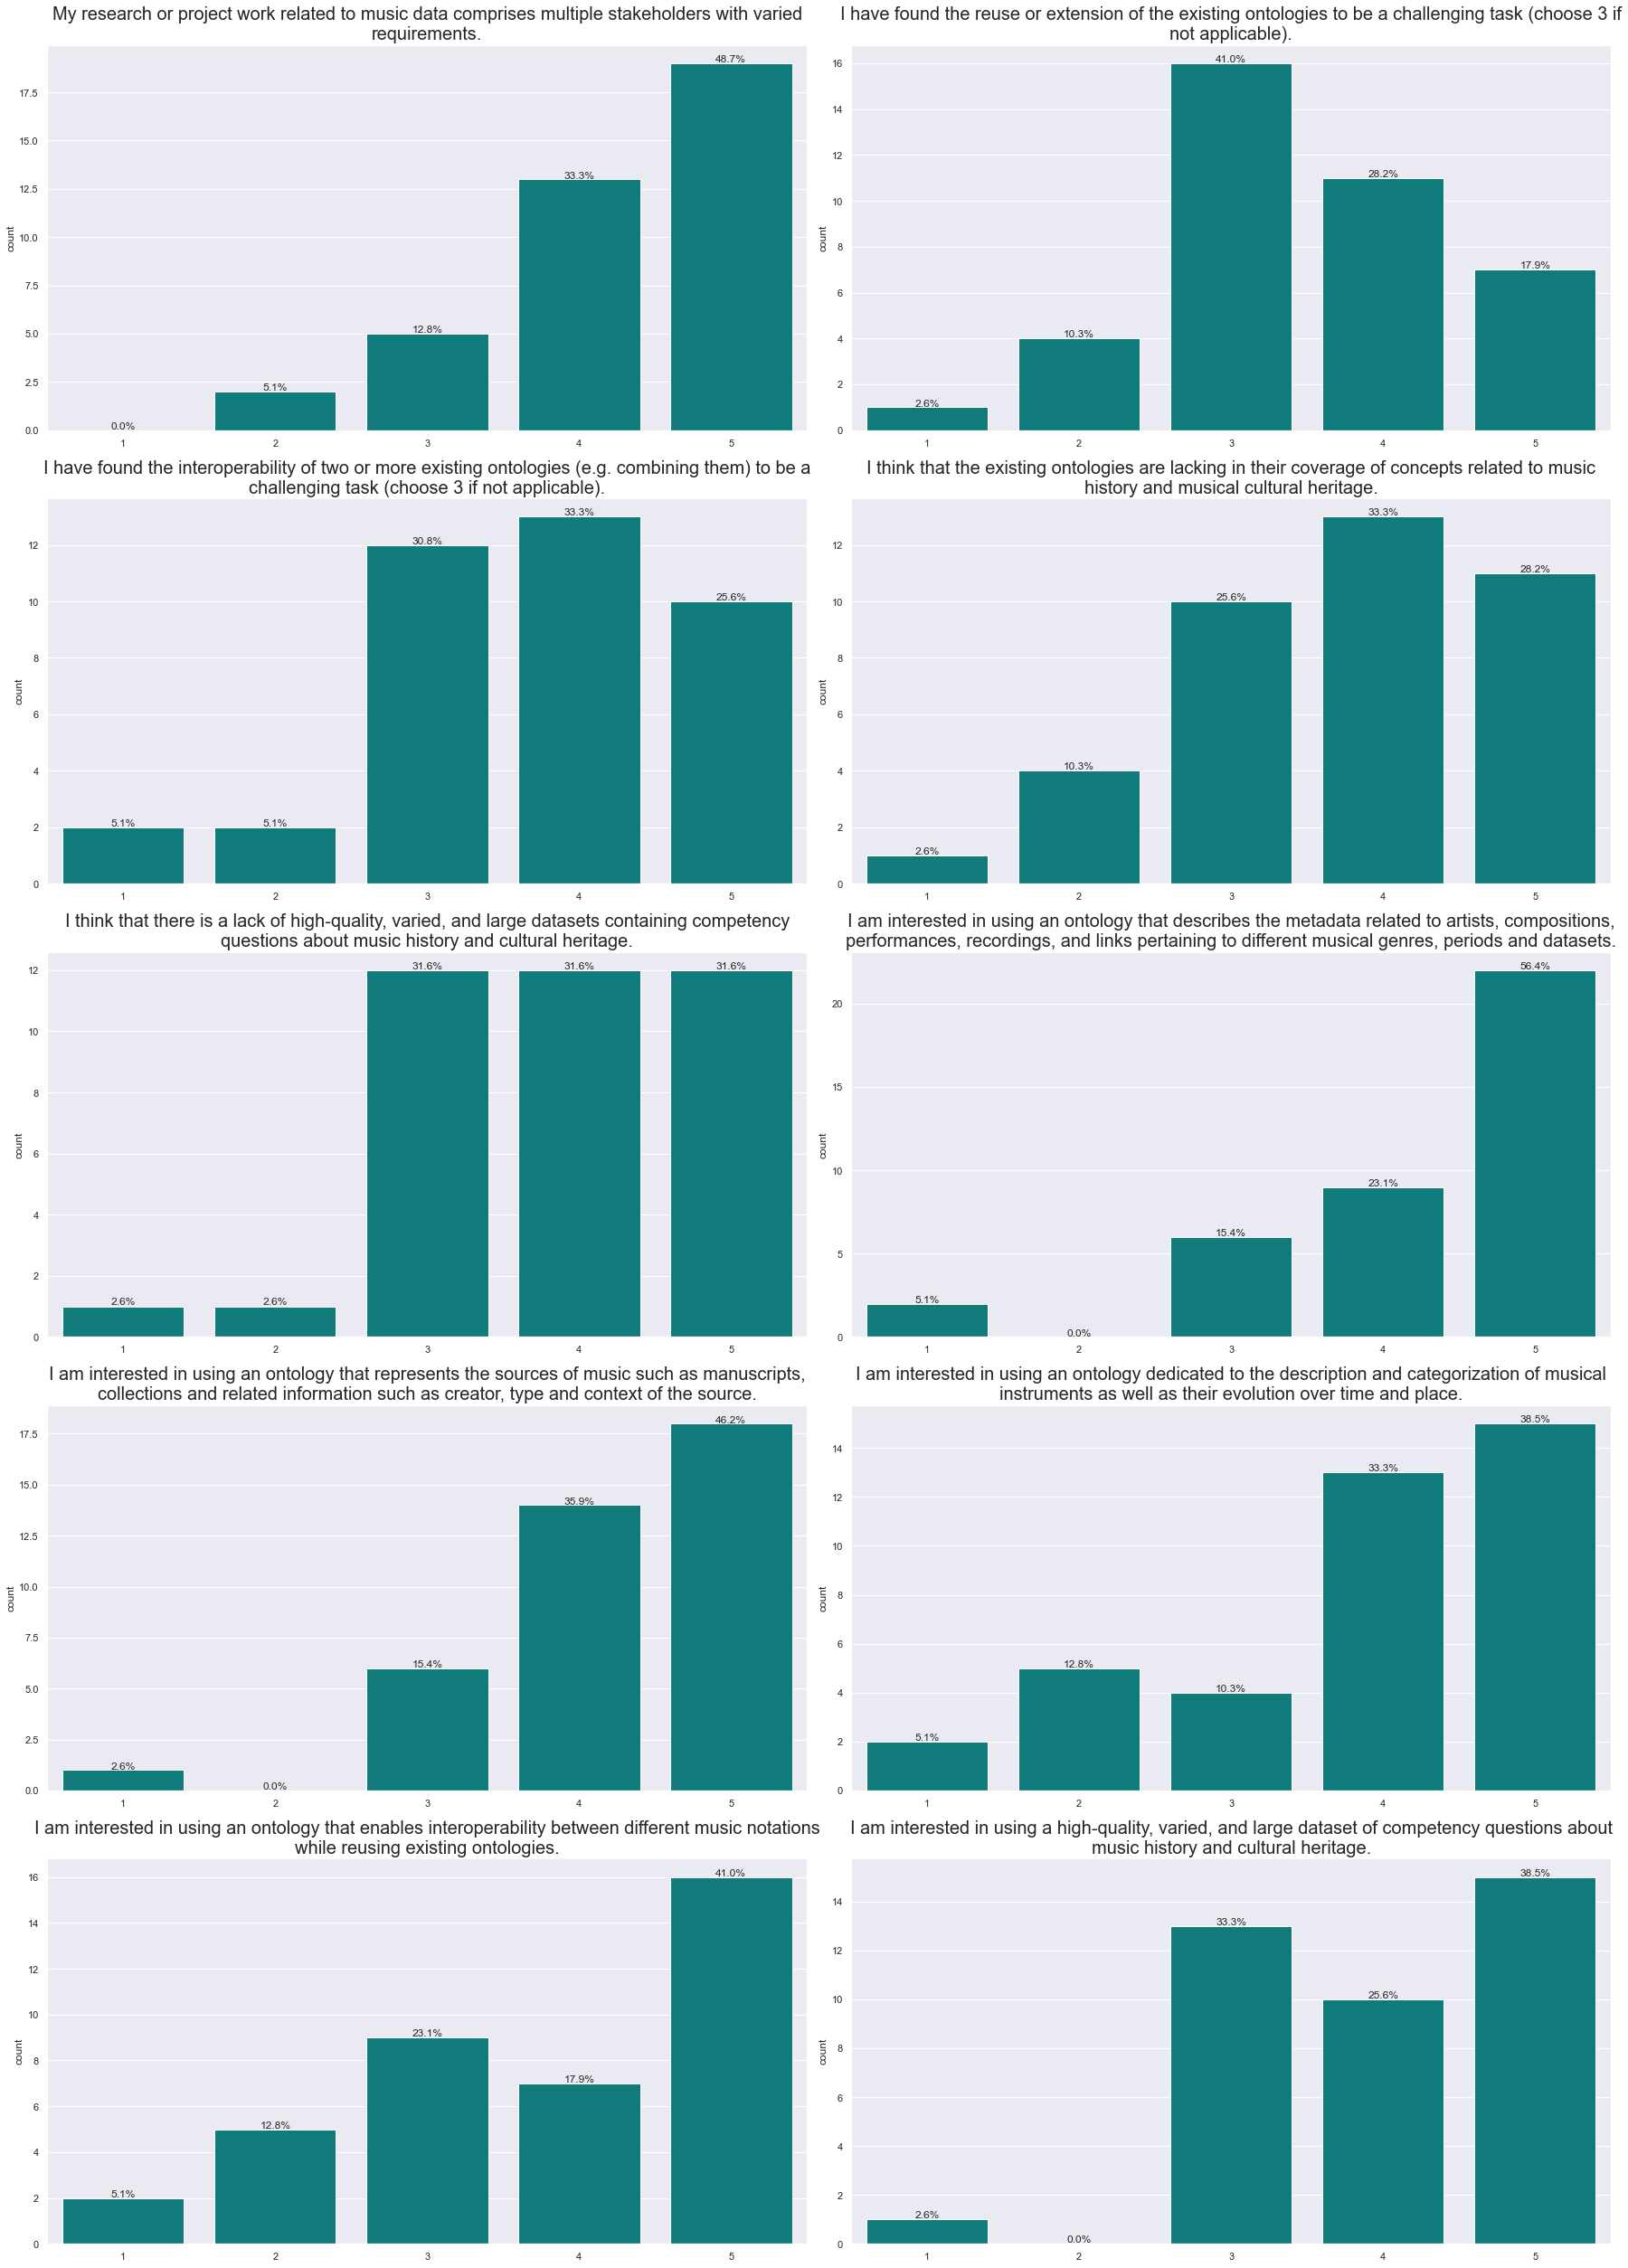

In [49]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(25, 35))

questions = list(survey_df.columns)
# questions[10] = questions[10].replace(" in addition to their label).", ").")
selection = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for i in range(10):  # expecting 8 plots in total
    question_barplot(selection[i], ax=axes[i//2, i%2], title_wrap=100, title_fs=20)

# plt.tight_layout()
fig.subplots_adjust(wspace=0.25, hspace=0.25)
plt.tight_layout()
plt.savefig("survey_evidence.pdf")